In [115]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re
import warnings
import os
warnings.filterwarnings('ignore')

## as we don't have individual masks for all subjects
## use time course of individual masks to replace those with common mask if they exists
## currently only for 6mm and 10mm individual masks

# seed time course with individual mask:
input_dir_ind = "data_fmri_time_course_conn_indmask/"

# read fc time course with common mask:
# input_dir = "data_fmri_time_course2/"
input_dir = "data_fmri_time_course_conn/"
input_dir2 = "data_fmri_time_course2/"

output_dir = "out03_functional_connectivity_conn_indmask/"
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

files_seed_ind = natsorted(
    glob.glob(input_dir_ind + "time_course_ind*.txt") 
    + glob.glob(input_dir2 + "time_course_NTS*.txt")
)

files_seed = natsorted(
    glob.glob(input_dir + "time_course_??HC*.txt") 
    + glob.glob(input_dir2 + "time_course_NTS*.txt")
)

files_target = natsorted(
    glob.glob(input_dir + "time_course_target_??HC*.txt") 
    + glob.glob(input_dir2 + "time_course_target_NTS*.txt")
)

# get files with common subject id:
subject_id = \
    set([int(x[-8:-4]) for x in files_seed]
).intersection(
    set([int(x[-8:-4]) for x in files_seed_ind])
).intersection(
    set([int(x[-8:-4]) for x in files_target])
)

files_seed_ind = [x for x in files_seed_ind if int(x[-8:-4]) in subject_id]
files_seed = [x for x in files_seed if int(x[-8:-4]) in subject_id]
files_target = [x for x in files_target if int(x[-8:-4]) in subject_id]

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'files_seed_ind': files_seed_ind,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    #'group': [re.findall("NTHC|NTS", x)[0] for x in files_seed],
    'group': ['HC' if int(x[-8:-4]) < 3000 else 'MDD' for x in files_seed],
})


df1 = pd.read_csv(files_seed[0], sep = '\t')
df1.pop(df1.columns[-1])
seed_list = list(df1.columns)
seed_list = ['_'.join(x.split('_')[1:]) for x in seed_list]
print(seed_list)

df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
target_list = list(df2.columns)
target_list = ['_'.join(x.split('_')[1:-1]) for x in target_list]
print(target_list)

# add Left and right Fp to seed:
seed_list = ['L_Fp_6mm', 'R_Fp_6mm', 'L_Fp_10mm', 'R_Fp_10mm'] + seed_list

# calculate pearson correlation between seed and target regions:
for seed in seed_list:
    # select only 10mm and 6mm mask:
    
    for target in target_list:
        col_label = seed + '-' + target
        df_connectivity[col_label] = np.nan
    
# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out02_img_file_info_mdd_tms_response.csv')

# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response.csv')
# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore_gm.3.csv')

subject_selected = list(df_nthc['subject_id'].unique()) + list(df_life_time_mdd['subject_id'])
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity


['L_aMFG_10-6mm', 'L_aMFG_10mm', 'L_aMFG_14-10mm', 'L_aMFG_14mm', 'L_aMFG_6mm', 'L_pMFG_10-6mm', 'L_pMFG_10mm', 'L_pMFG_14-10mm', 'L_pMFG_14mm', 'L_pMFG_6mm', 'R_aMFG_10-6mm', 'R_aMFG_10mm', 'R_aMFG_14-10mm', 'R_aMFG_14mm', 'R_aMFG_6mm', 'R_FEF_10-6mm', 'R_FEF_10mm', 'R_FEF_14-10mm', 'R_FEF_14mm', 'R_FEF_6mm', 'R_IFJ_10-6mm', 'R_IFJ_10mm', 'R_IFJ_14-10mm', 'R_IFJ_14mm', 'R_IFJ_6mm', 'R_IPL_10-6mm', 'R_IPL_10mm', 'R_IPL_14-10mm', 'R_IPL_14mm', 'R_IPL_6mm', 'R_M1_10-6mm', 'R_M1_10mm', 'R_M1_14-10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10-6mm', 'R_pMFG_10mm', 'R_pMFG_14-10mm', 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10-6mm', 'R_preSMA_10mm', 'R_preSMA_14-10mm', 'R_preSMA_14mm', 'R_preSMA_6mm']
['FIRST_B_amyg', 'FIRST_L_amyg', 'FIRST_R_amyg', 'FSL_B_Amy', 'FSL_L_Amy', 'FSL_R_Amy', 'ROI_B_Amy_Com', 'ROI_L_Amy_Com', 'ROI_R_Amy_Com', 'sgACC_6_16_-10']


In [116]:
df_connectivity.head()

,files_seed,files_target,files_seed_ind,subject_id,group,L_Fp_6mm-FIRST_B_amyg,L_Fp_6mm-FIRST_L_amyg,L_Fp_6mm-FIRST_R_amyg,L_Fp_6mm-FSL_B_Amy,L_Fp_6mm-FSL_L_Amy,...,R_preSMA_6mm-FIRST_B_amyg,R_preSMA_6mm-FIRST_L_amyg,R_preSMA_6mm-FIRST_R_amyg,R_preSMA_6mm-FSL_B_Amy,R_preSMA_6mm-FSL_L_Amy,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10
1,data_fmri_time_course2/time_course_NTS3006.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3006.txt,3006,MDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,data_fmri_time_course2/time_course_NTS3045.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3045.txt,3045,MDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,data_fmri_time_course2/time_course_NTS3053.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3053.txt,3053,MDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,data_fmri_time_course2/time_course_NTS3074.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3074.txt,3074,MDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,data_fmri_time_course2/time_course_NTS3086.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3086.txt,3086,MDD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:

for i in tqdm(range(len(df_connectivity.index))):
    
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
    col_list = list(df1.columns)
    df1.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
    col_list = list(df2.columns)
    df2.columns = ['_'.join(x.split('_')[1:-1]) for x in col_list]
    
    #print(df_connectivity.iloc[i, 2])
    df3 = pd.read_csv(df_connectivity.iloc[i, 2], sep = '\t')
    df3.pop(df3.columns[-1])
    col_list = list(df3.columns)
    df3.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    
    
    corr = []
    
    for seed in seed_list:
        for target in target_list:
            if seed in df3 and all(df3[seed].values != 0):
                corr.append(np.corrcoef(df3[seed].values, df2[target].values)[0][1])
            elif seed in df1:
                corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
            else:
                corr.append(np.nan)
        
    df_connectivity.iloc[i, 5:] = corr
    
#     break

df_connectivity.to_csv(output_dir + 'out03_functional_connectivity.csv', index = None)


100%|███████████████████████████████████████████| 48/48 [00:04<00:00, 11.15it/s]


In [123]:
df_connectivity.head()

,files_seed,files_target,files_seed_ind,subject_id,group,L_Fp_6mm-FIRST_B_amyg,L_Fp_6mm-FIRST_L_amyg,L_Fp_6mm-FIRST_R_amyg,L_Fp_6mm-FSL_B_Amy,L_Fp_6mm-FSL_L_Amy,...,R_preSMA_6mm-FIRST_B_amyg,R_preSMA_6mm-FIRST_L_amyg,R_preSMA_6mm-FIRST_R_amyg,R_preSMA_6mm-FSL_B_Amy,R_preSMA_6mm-FSL_L_Amy,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10
1,data_fmri_time_course2/time_course_NTS3006.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3006.txt,3006,MDD,NaN,NaN,NaN,NaN,NaN,...,0.003461,0.159394,-0.105448,0.030396,0.193113,-0.097766,0.021573,0.106469,-0.062757,0.419125
18,data_fmri_time_course2/time_course_NTS3045.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3045.txt,3045,MDD,NaN,NaN,NaN,NaN,NaN,...,0.215637,0.227713,0.184329,0.275649,0.274292,0.245814,0.221117,0.227096,0.185847,0.232927
22,data_fmri_time_course2/time_course_NTS3053.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3053.txt,3053,MDD,NaN,NaN,NaN,NaN,NaN,...,-0.194787,-0.262136,-0.114243,-0.155795,-0.241493,-0.072644,-0.184526,-0.241183,-0.117569,-0.190959
28,data_fmri_time_course2/time_course_NTS3074.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3074.txt,3074,MDD,NaN,NaN,NaN,NaN,NaN,...,0.815658,0.926267,0.485225,0.828953,0.932369,0.515270,0.798149,0.894376,0.430252,-0.889821
33,data_fmri_time_course2/time_course_NTS3086.txt,data_fmri_time_course2/time_course_target_NTS3...,data_fmri_time_course2/time_course_NTS3086.txt,3086,MDD,NaN,NaN,NaN,NaN,NaN,...,0.282294,0.284432,0.247074,0.314616,0.310163,0.283473,0.228916,0.250653,0.172377,0.212332


In [124]:
# fisher z transform FC (pearson's correlation)

# import re
import pandas as pd

df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

fc_cols = [x for x in df_connectivity.columns if re.search('-', x)]
for col in fc_cols:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)
    

df_connectivity.drop(columns = ['files_seed', 'files_target', 'files_seed_ind'], inplace = True)
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity_z.csv', index = None)
df_connectivity.describe()


,subject_id,L_Fp_6mm-FIRST_B_amyg,L_Fp_6mm-FIRST_L_amyg,L_Fp_6mm-FIRST_R_amyg,L_Fp_6mm-FSL_B_Amy,L_Fp_6mm-FSL_L_Amy,L_Fp_6mm-FSL_R_Amy,L_Fp_6mm-ROI_B_Amy_Com,L_Fp_6mm-ROI_L_Amy_Com,L_Fp_6mm-ROI_R_Amy_Com,...,R_preSMA_6mm-FIRST_B_amyg,R_preSMA_6mm-FIRST_L_amyg,R_preSMA_6mm-FIRST_R_amyg,R_preSMA_6mm-FSL_B_Amy,R_preSMA_6mm-FSL_L_Amy,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10
count,48.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1344.187500,-0.004326,-0.012740,-0.001310,-0.009206,-0.020803,-0.002841,-0.011038,-0.035972,0.006792,...,0.064560,0.084992,0.033550,0.087004,0.097830,0.062560,0.062387,0.076539,0.025936,-0.065835
std,720.291243,0.192553,0.229637,0.157622,0.194101,0.227982,0.161110,0.208134,0.245115,0.188060,...,0.239160,0.313978,0.171105,0.241018,0.317702,0.170675,0.247365,0.300507,0.162951,0.297027
min,1001.000000,-0.331298,-0.472460,-0.295754,-0.344642,-0.445902,-0.302165,-0.370212,-0.542252,-0.350193,...,-0.399767,-0.471413,-0.333959,-0.354574,-0.456954,-0.311730,-0.466127,-0.510293,-0.339563,-1.421063
25%,1028.750000,-0.150672,-0.162923,-0.102923,-0.155683,-0.167773,-0.089437,-0.169424,-0.191173,-0.127827,...,-0.048374,-0.070946,-0.091472,-0.046622,-0.075617,-0.046631,-0.077429,-0.079399,-0.037763,-0.164706
50%,1052.500000,0.019554,-0.019110,-0.000174,-0.002862,-0.002639,0.006530,-0.003322,-0.073354,0.014007,...,0.067195,0.076127,0.035870,0.111859,0.083722,0.067799,0.047184,0.054250,0.021203,-0.076417
75%,1099.500000,0.130256,0.180222,0.092272,0.132766,0.156716,0.105455,0.142181,0.157360,0.110801,...,0.154954,0.163121,0.159123,0.166012,0.171666,0.160912,0.156575,0.196540,0.155329,0.085663
max,3116.000000,0.304797,0.355560,0.294216,0.284354,0.335764,0.267575,0.383996,0.361106,0.353228,...,1.143706,1.631441,0.529795,1.184781,1.676216,0.569878,1.093491,1.443382,0.460206,0.580246


In [203]:
# ttest:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv')
# df_connectivity_long = pd.wide_to_long(df_connectivity, target_list, i="id", j="year")

from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import numpy as np

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.001)] = '<.001***'
        
    return report2

# target_list = ['sgACC_6_16_-10', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small']
target_list = ['sgACC_6_16_-10', 'FIRST_B_amyg', 'FIRST_L_amyg', 'FIRST_R_amyg']
mask = '_10mm-'

test_variables = []
for seed in target_list:
    test_variables += [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]

row_index = pd.MultiIndex.from_tuples([(i , j) for i in seed_list for j in ['t value', 'p value', "Cohen's d"]])

col = ['L_Fp', 'R_Fp', 'L_aMFG','R_aMFG', 'L_pMFG', 'R_pMFG', 'R_IFJ', 'R_FEF', 'R_M1', 'R_preSMA', 'R_IPL']
result = pd.DataFrame(index = row_index, 
#                       columns = list(set([x.split('-')[0] for x in test_variables]),
                     columns = col)

result_hc = result.copy()

# statistical tests for each roi and roi setting:
for var in test_variables:
        
    seed = '-'.join(var.split('-')[1:])
    target = var.split('-')[0]
    target = '_'.join(target.split('_')[:2])
    
    hc = df_connectivity.loc[(df_connectivity['group']=='HC'), var].values
    hc = hc[~np.isnan(hc)]
    mdd = df_connectivity.loc[(df_connectivity['group']=='MDD') & (~df_connectivity[var].isna()), var].values
    mdd = mdd[~np.isnan(mdd)]
    
    t, p = ttest_ind(hc, mdd)
    cohend = (np.mean(hc) - np.mean(mdd)) / (np.sqrt((np.std(hc) ** 2 + np.std(mdd) ** 2) / 2))
    result.loc[(seed, 't value'), target] = t
    result.loc[(seed, 'p value'), target] = p
    result.loc[(seed, "Cohen's d"), target] = cohend
    
    t, p = ttest_1samp(hc, popmean=0)
    cohend = np.mean(hc) / np.std(hc)
    result_hc.loc[(seed, 't value'), target] = t
    result_hc.loc[(seed, 'p value'), target] = p
    result_hc.loc[(seed, "Cohen's d"), target] = cohend
    

# save results separately for each roi setting:
# for var in test_variables:
#     result.loc[(tms, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_file_prefix + 'response_' + var + '.csv')

# result = format_table(result)
# result.to_csv('out03_ttest' + mask + '.csv')
# result.loc[(seed_list, ['p value', "Cohen's d"]), :]

result_hc = format_table(result_hc)
result_hc.to_csv('out03_ttest_hc' + mask + '.csv')
result_hc.loc[(seed_list, ['p value', "Cohen's d"]), :]

L_Fp    R_Fp  L_aMFG   R_aMFG    L_pMFG  R_pMFG  \
sgACC_6_16_-10 p value    0.037*   0.164   0.780  0.005**     0.276   0.144   
               Cohen's d   0.459   0.260  -0.044   -0.461    -0.174  -0.235   
FIRST_B_amyg   p value     0.329  0.015*   0.085   0.018*  <.001***  0.019*   
               Cohen's d  -0.207  -0.469  -0.278   -0.388    -0.600  -0.385   
FIRST_L_amyg   p value     0.518  0.028*   0.390   0.030*    0.035*   0.058   
               Cohen's d  -0.136  -0.419  -0.137   -0.353    -0.344  -0.307   
FIRST_R_amyg   p value     0.225  0.022*  0.048*   0.028*  <.001***  0.019*   
               Cohen's d  -0.259  -0.438  -0.322   -0.359    -0.714  -0.385   

                           R_IFJ     R_FEF      R_M1 R_preSMA     R_IPL  
sgACC_6_16_-10 p value    0.010*  <.001***     0.353   0.019*     0.287  
               Cohen's d  -0.426    -0.689     0.148   -0.384     0.170  
FIRST_B_amyg   p value     0.112    0.019*  <.001***    0.051  <.001***  
               Cohen's d   0.256    -0.384     1.037    0.317    -0.682  
FIRST_L_amyg   p value     0.088   0.008**  <.001***   0.043*  <.001***  
               Cohen's d   0.276    -0.440     1.001    0.330    -0.730  
FIRST_R_amyg   p value     0.211    0.032*  <.001***    0.194  <.001***  
               Cohen's d   0.200    -0.349     0.868    0.208    -0.566

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mcolors.CSS4_COLORS

a4_dims = (12, 8)

# colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(roi_cols)).as_hex()
# colors = colors[1::2] + colors[2::2] 
colors = [mcolors.CSS4_COLORS['dimgray'], 
#           mcolors.CSS4_COLORS['darkgrey'],
          mcolors.CSS4_COLORS['darkgrey'],
         ]

swarm_colors = [mcolors.CSS4_COLORS['black'], 
                mcolors.CSS4_COLORS['black'],
#                 mcolors.CSS4_COLORS['darkgray'],
               ]


def make_plot(plot_data, ylabel, xticklabel):
    group_label = ['HC', 'MDD']

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

    sns.swarmplot(y = 'tms_response', x = "ROI", data = plot_data, 
                  hue = 'group', hue_order = ['NTHC', 'NTS'],
                  order=plot_x_order,
                  dodge=True, ax = ax, 
                  facecolors='none',
                  edgecolor = "black",
                  palette = swarm_colors, 
                  alpha = .25, size=4)

    sns.barplot(y = 'tms_response', x = "ROI", data = plot_data, 
                hue = 'group', hue_order = ['NTHC', 'NTS'],
                order=plot_x_order, 
    #             errorbar=('ci', 95),
                errorbar = 'se',
                palette = colors, ax = ax)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], group_label, frameon = False, ncol = 2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(plot_x_order)])
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xticklabel)
    #ax.set_xlabel("Group");
    plt.xticks(rotation = 45)
    
    return fig

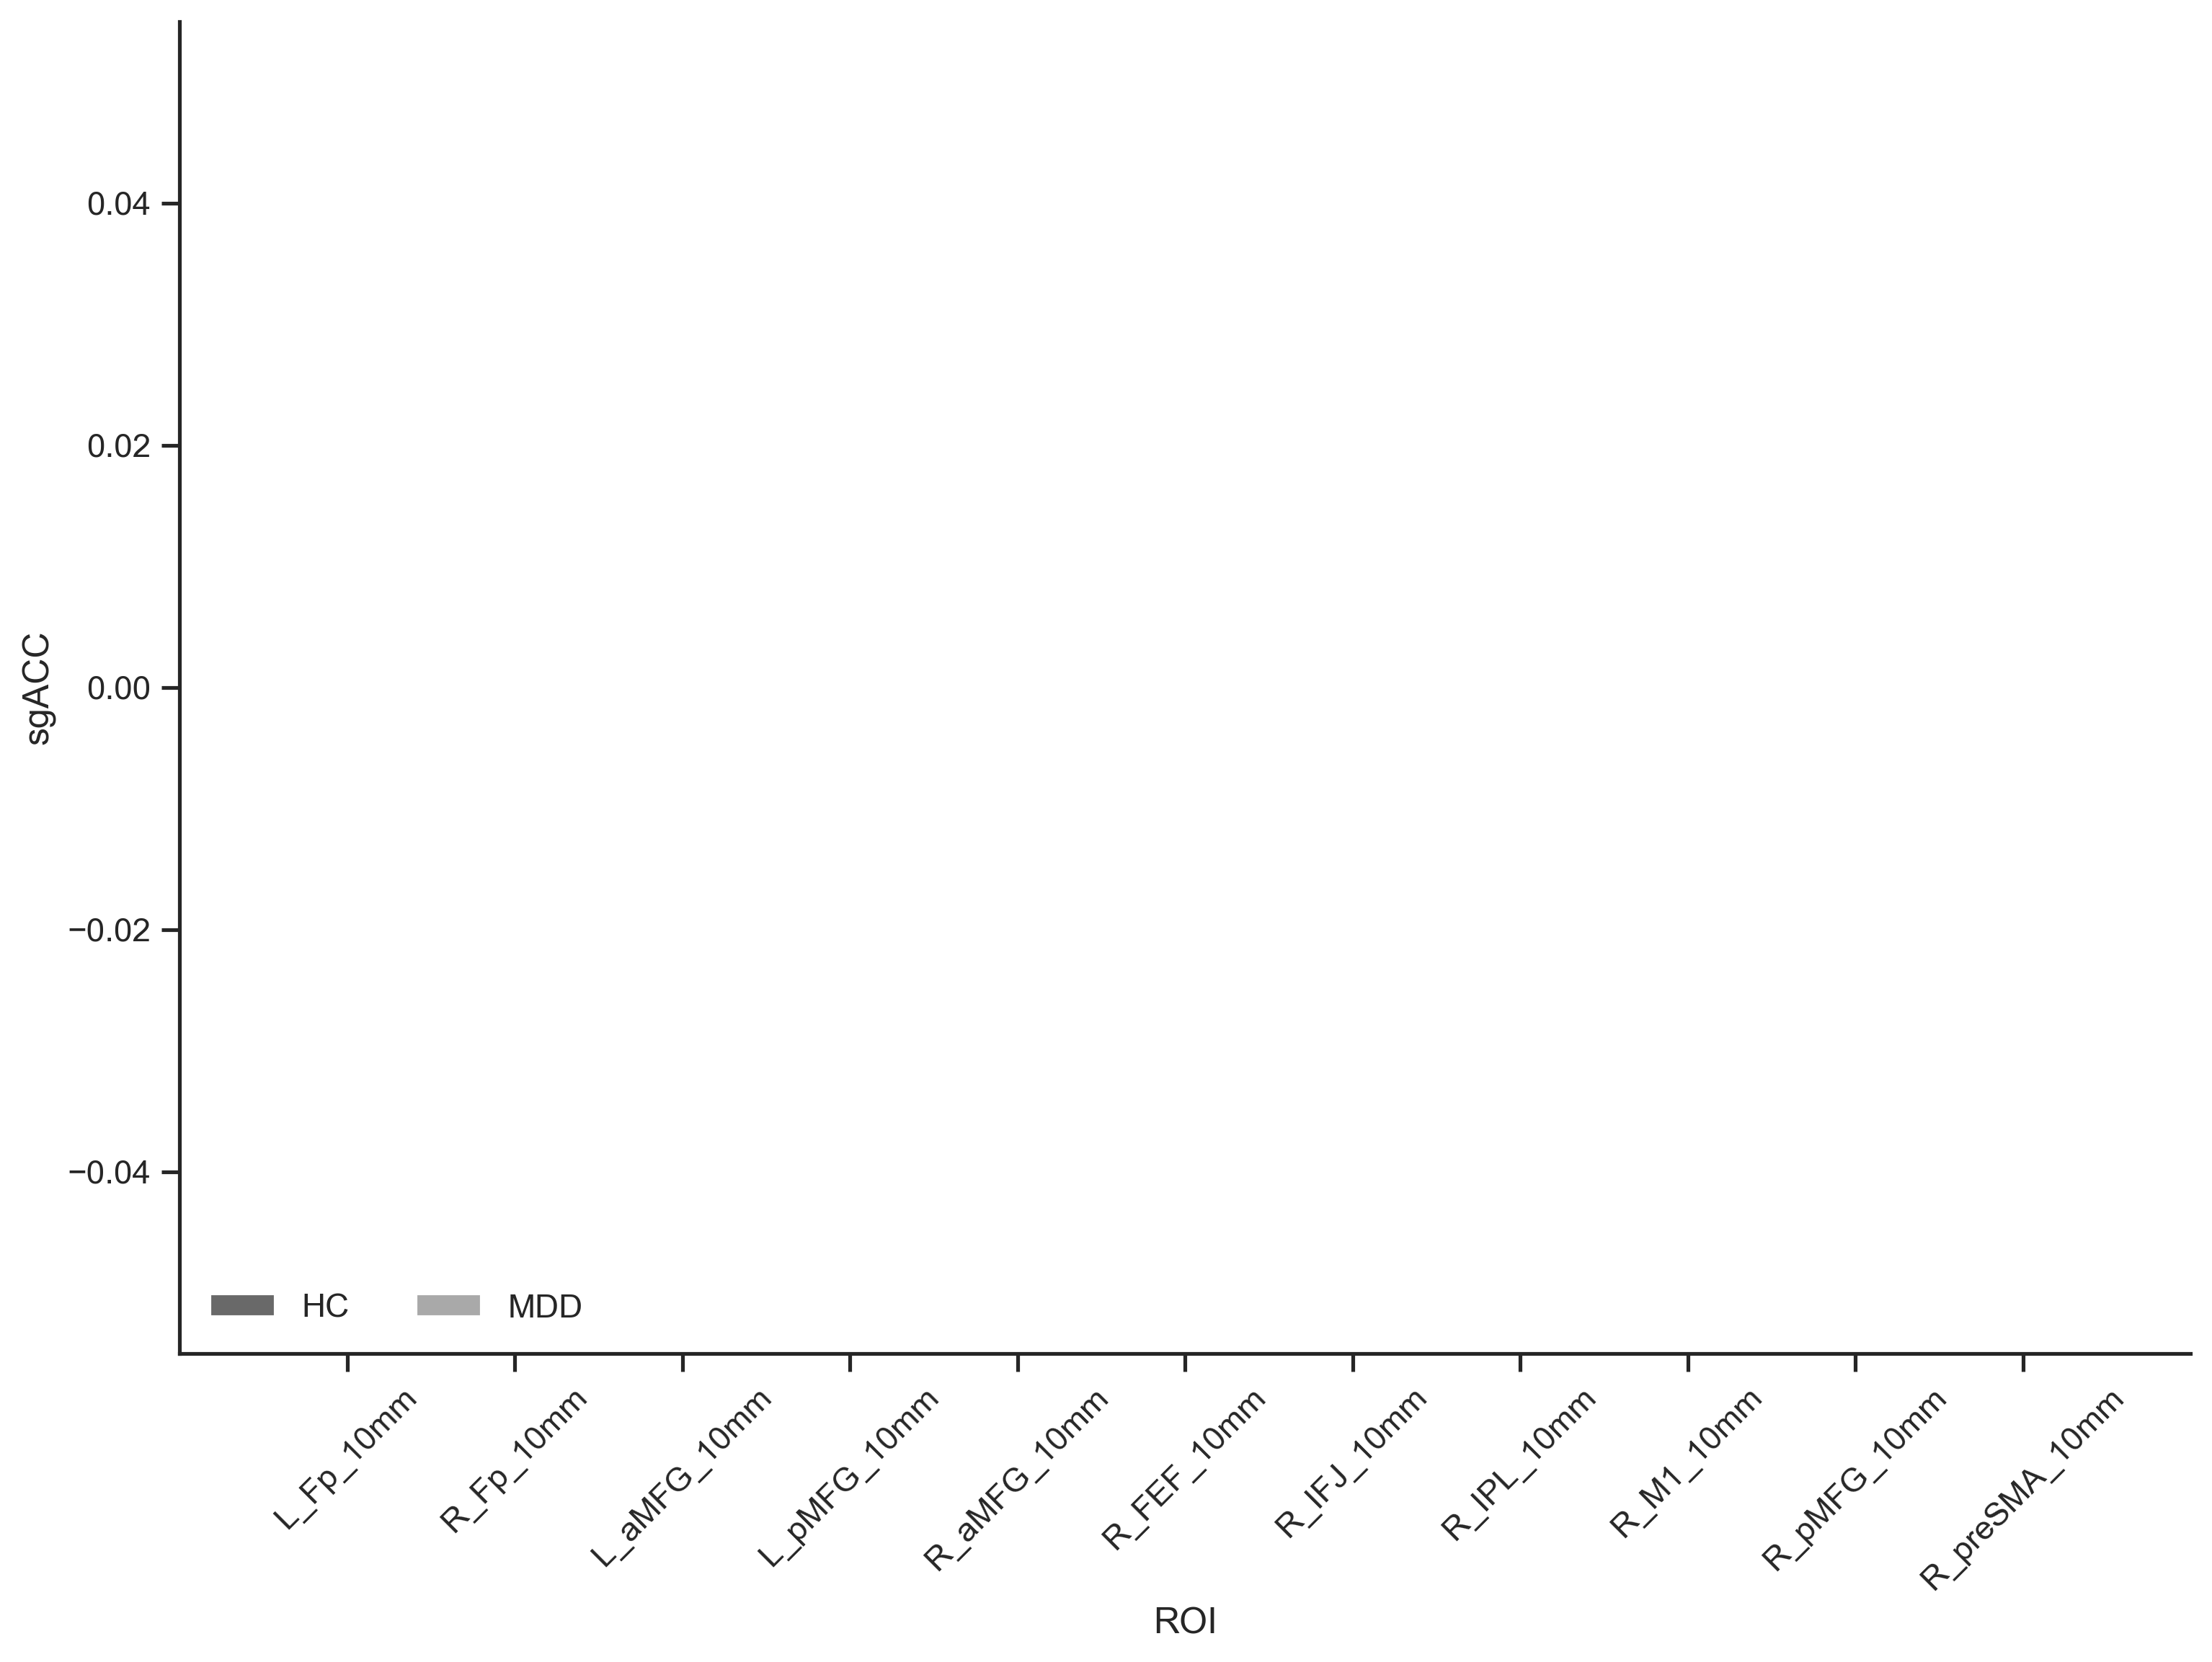

In [157]:
sns.set_style(style='white') 
sns.set_style("ticks")

# 6mm mask:
mask = '_10mm-'
seed = 'sgACC'

plot_x_order = [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]
cols_select = ["subject_id", "group"] + plot_x_order
xtick_label = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars=["subject_id", "group"], 
                    value_vars=plot_x_order, 
                    var_name="ROI", 
                    value_name="tms_response")

fig = make_plot(data_plot, seed, xtick_label)


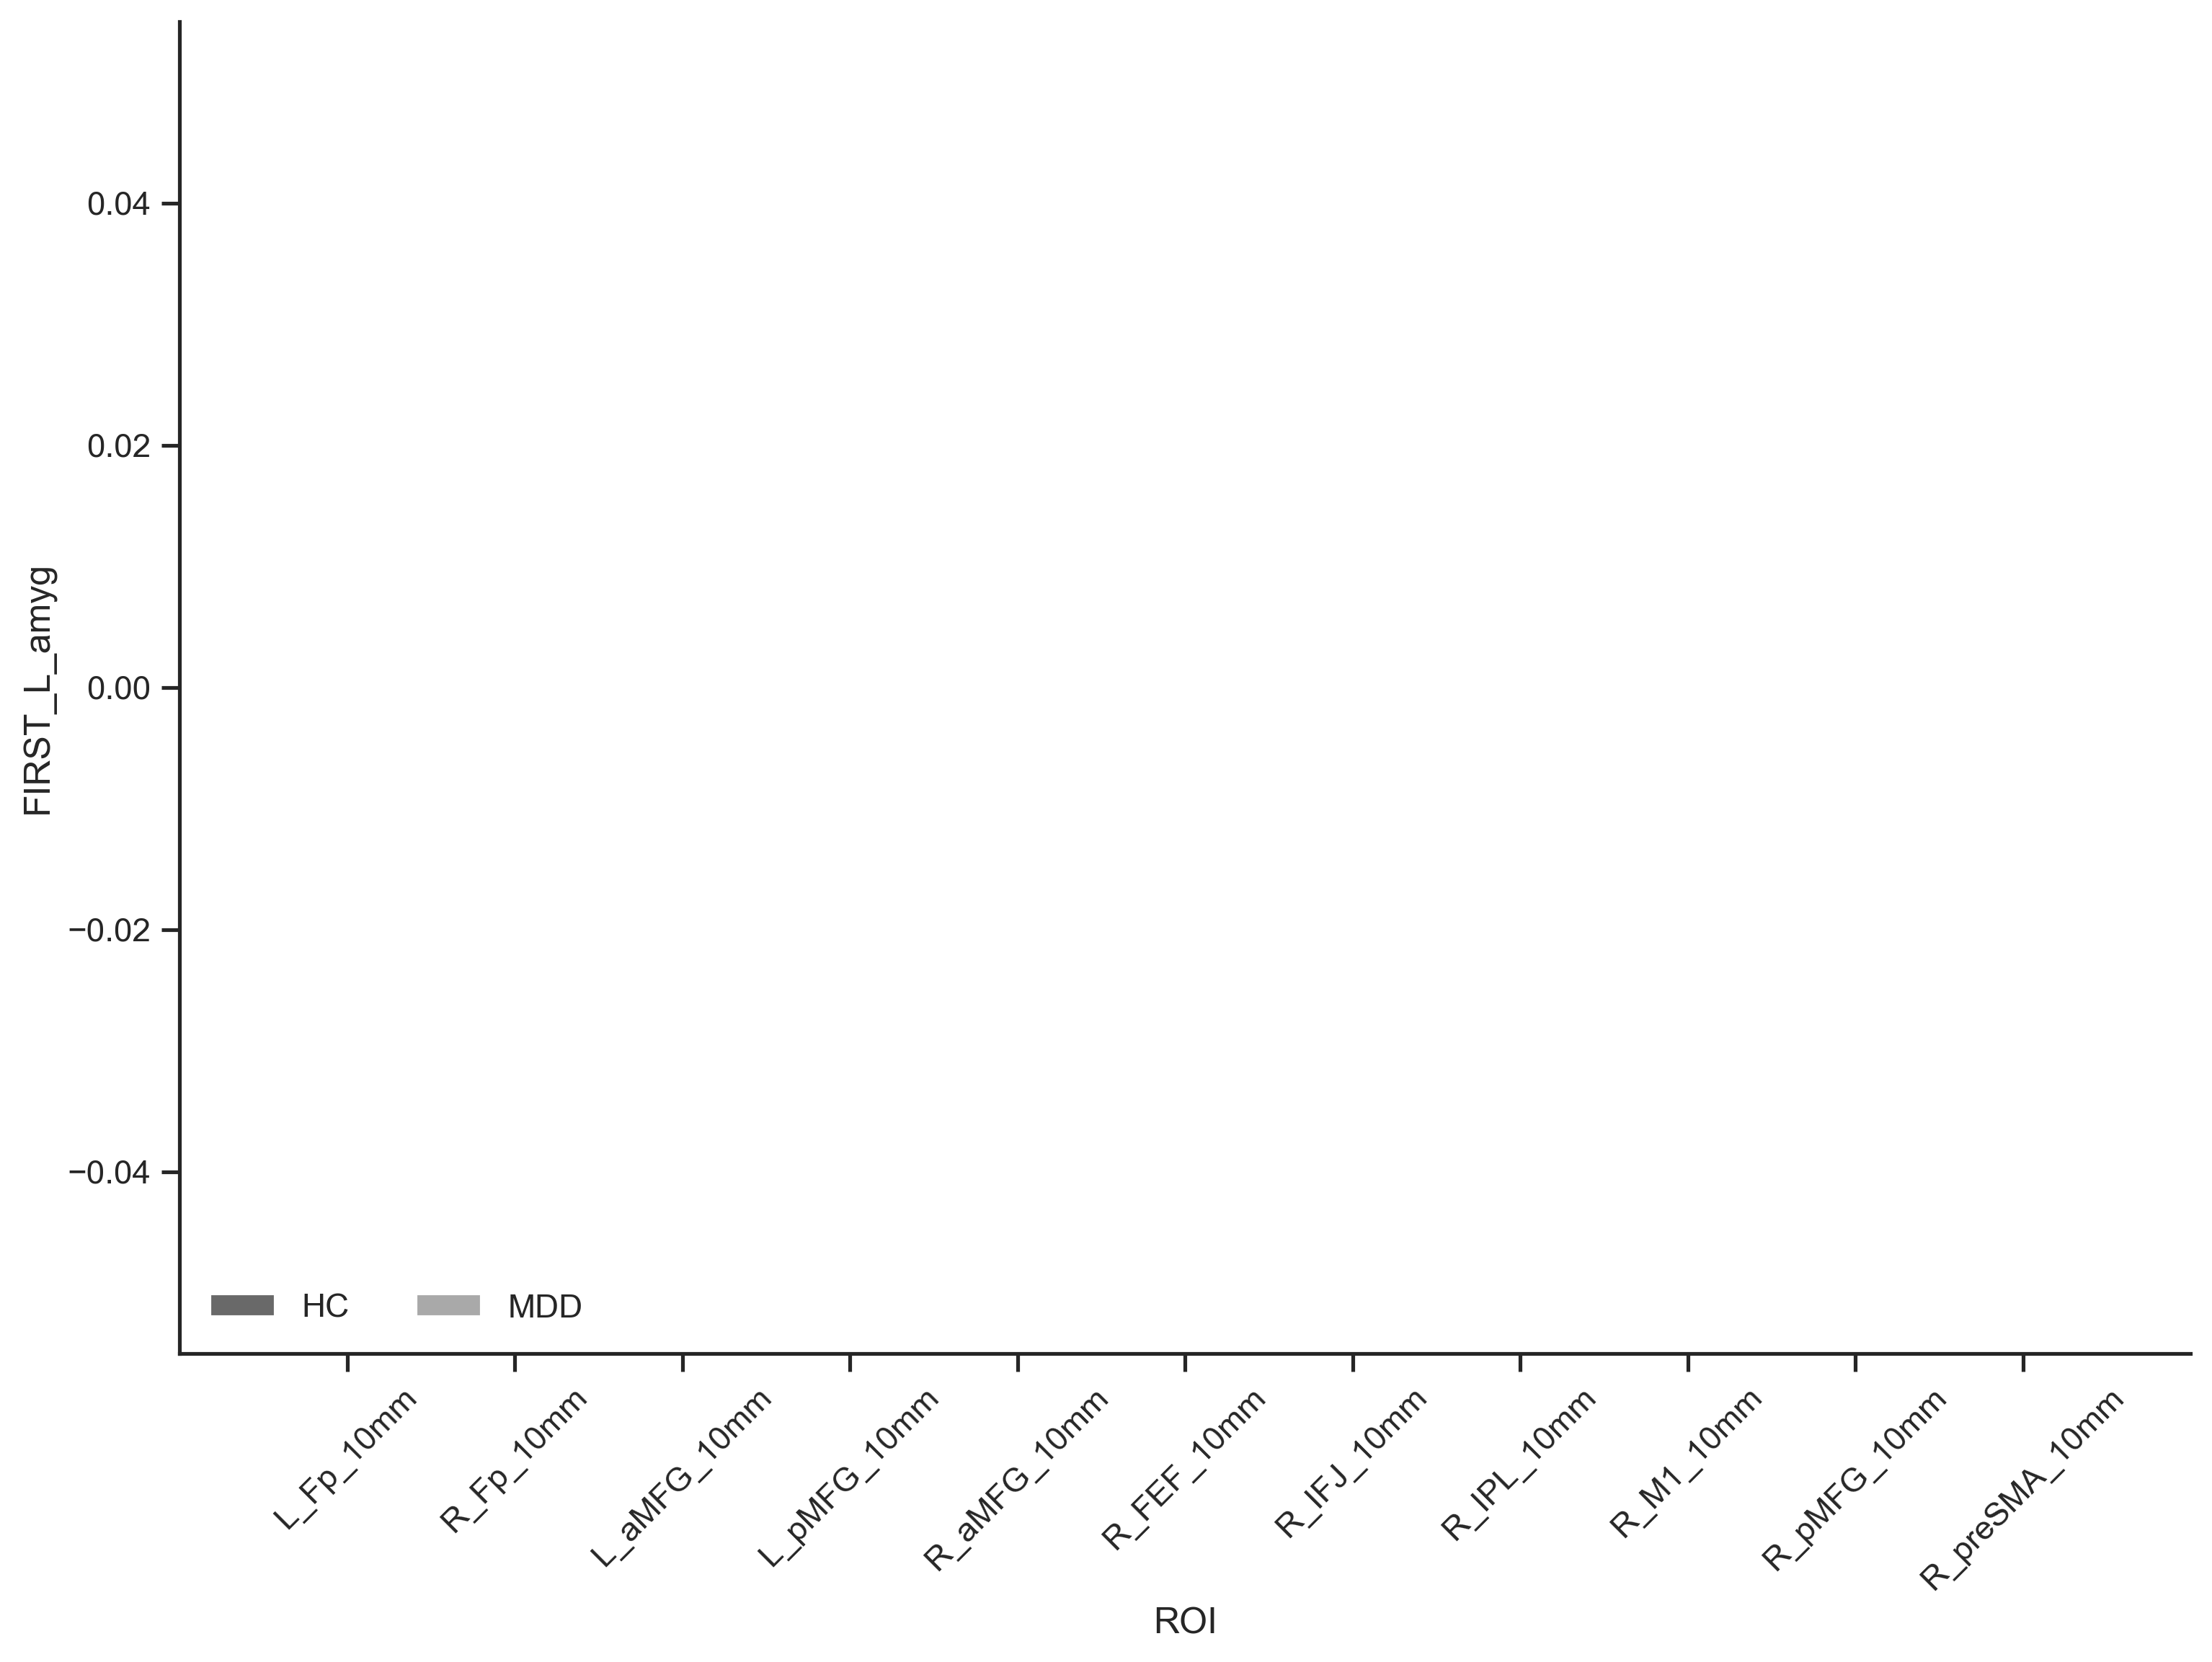

In [158]:
sns.set_style(style='white') 
sns.set_style("ticks")

# mask:
mask = '_10mm-'
seed = 'FIRST_L_amyg'

plot_x_order = [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]
cols_select  = ["subject_id", "group"] + plot_x_order
xtick_label  = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars    = ["subject_id", "group"], 
                    value_vars = plot_x_order, 
                    var_name   = "ROI", 
                    value_name = "tms_response")

fig = make_plot(data_plot, seed, xtick_label)


In [197]:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv', )

# add mean response of amygdala (of current resting state data) to dataframe:
# roi_name = ["FIRST_B_amyg_small", "FIRST_L_amyg_small", "FIRST_R_amyg_small"]
# roi_index= [0, 1, 2]

# for idx, name in zip(roi_index, roi_name):
#     mean_response = []
#     for i, f in enumerate(df_connectivity['files_target']):
#         df2 = pd.read_csv(files_target[0], sep = '\t')
#         df2.pop(df2.columns[-1])
#         mean_response.append(df2.iloc[i,:].mean())
        
#     df_connectivity[name] = mean_response

# add tms induced responsed in amygdala (of tms session) to dataframe:

col = [
#     "FSL_R_Amy_thr40",
#     "ROI_R_Amy_Com_MNI",
    "FIRST_R_amyg_small",
#     "ROI_B_Amy_Com_MNI",
#     "FSL_L_Amy_thr40",
    "FIRST_B_amyg_small",
#     "FSL_B_Amy_thr40",
#     "ROI_L_Amy_Com_MNI",
    "FIRST_L_amyg_small",
    "sgACC_6_16_-10_10mm",
]

### select response data set:
tms_response_hc = pd.read_csv("out02_img_file_info_nthc_tms_response.csv")
# tms_response_hc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore_gm.3.csv')

tms_response_mdd = pd.read_csv("out02_img_file_info_mdd_tms_response.csv")

tms_response = pd.concat([tms_response_hc, tms_response_mdd], axis = 0, keys = ['HC', 'MDD'])
# tms_response.reset_index(level = 0, inplace = True, names = 'group')
tms_response.reset_index(level = 0, inplace = True)
tms_response.rename(columns = {'level_0': 'group'}, inplace = True)
tms_response = tms_response[['subject_id', 'site'] + col]

df_connectivity_merge = df_connectivity.merge(tms_response, on = 'subject_id', how = 'inner')
df_connectivity_merge


,subject_id,group,L_Fp_6mm-FIRST_B_amyg,L_Fp_6mm-FIRST_L_amyg,L_Fp_6mm-FIRST_R_amyg,L_Fp_6mm-FSL_B_Amy,L_Fp_6mm-FSL_L_Amy,L_Fp_6mm-FSL_R_Amy,L_Fp_6mm-ROI_B_Amy_Com,L_Fp_6mm-ROI_L_Amy_Com,...,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10,site,FIRST_R_amyg_small,FIRST_B_amyg_small,FIRST_L_amyg_small,sgACC_6_16_-10_10mm
0,3006,MDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,L_pMFG,0.245721,0.345136,0.454776,-0.270959
1,3006,MDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,L_aMFG,-0.648229,-0.397126,-0.120195,0.462169
2,3006,MDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,R_M1,-0.524258,-0.246509,0.059809,-0.209595
3,3006,MDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,R_pMFG,-0.198388,-0.134283,-0.063584,-0.059858
4,3006,MDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,R_aMFG,-0.833138,-0.558441,-0.255490,-0.530966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1108,HC,0.278199,0.28983,0.249249,0.263493,0.263306,0.245256,0.299959,0.290635,...,-0.010913,-0.006192,-0.027982,0.012936,0.309732,L_pMFG,-0.188161,-0.459643,-0.759049,-0.130635
231,1108,HC,0.278199,0.28983,0.249249,0.263493,0.263306,0.245256,0.299959,0.290635,...,-0.010913,-0.006192,-0.027982,0.012936,0.309732,L_aMFG,-0.961125,-1.193334,-1.449428,-0.082795
232,1108,HC,0.278199,0.28983,0.249249,0.263493,0.263306,0.245256,0.299959,0.290635,...,-0.010913,-0.006192,-0.027982,0.012936,0.309732,R_M1,-0.354299,-0.392541,-0.434715,-0.271843
233,1108,HC,0.278199,0.28983,0.249249,0.263493,0.263306,0.245256,0.299959,0.290635,...,-0.010913,-0.006192,-0.027982,0.012936,0.309732,R_pMFG,0.165889,0.101048,0.029538,-0.359279


In [198]:
# correlation between mean response at amygdala and FC with stimulate site:

# roi_name = ["FIRST_B_amyg", "FIRST_L_amyg", "FIRST_R_amyg"]

# roi pattern to search for columns in FC.
roi_name = ["FIRST_L_amyg", "FIRST_R_amyg", "sgACC"]

# col name for tms induced response
roi_col_name = ["FIRST_L_amyg_small", "FIRST_R_amyg_small", "sgACC_6_16_-10_10mm"]

mask_size = '_10mm-'

plot_data_all = []
for roi, roi_col in zip(roi_name, roi_col_name):
    seed_roi = [x for x in df_connectivity_merge.columns if re.search(mask_size, x) and re.search(roi, x)]
    plot_data = []
    for seed in seed_roi:
        plot_data_i = df_connectivity_merge[['subject_id', 'group', 'site', roi_col, seed]]
        plot_data_i.columns = ['subject_id', 'group', 'site', 'mean_response', 'connectivity']
        plot_data.append(plot_data_i)
        
    plot_data = pd.concat(plot_data, axis = 0, keys = seed_roi)
    plot_data_all.append(plot_data)
    
plot_data_all = pd.concat(plot_data_all, axis = 0, keys = roi_name)
plot_data_all.reset_index(level = [0, 1], inplace = True)
plot_data_all.columns.values[:2] = ['seed', 'target']

plot_data_all['seed'].replace({'FIRST_': ''}, regex=True, inplace = True)
plot_data_all['seed'].replace({'_small': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + 'FIRST_.*': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + 'sgACC_.*': ''}, regex=True, inplace = True)

plot_data_all = plot_data_all.loc[plot_data_all['target'] == plot_data_all['site'], :]

plot_data_all = plot_data_all.loc[plot_data_all['group'] == "HC", :]

### remove outliers:
m   = plot_data_all['mean_response'].mean()
std = plot_data_all['mean_response'].std()

lower, upper = m - 2.5 * std, m + 3 * std

print(plot_data_all.loc[(plot_data_all['mean_response']<=lower) | 
                        (plot_data_all['mean_response']>=upper), :])
plot_data_all = plot_data_all.loc[(plot_data_all['mean_response']>lower) & 
                                  (plot_data_all['mean_response']<upper), :]


plot_data_all = plot_data_all.loc[plot_data_all['target'].isin(['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']), :]

# plot_data_all['target'] = pd.Categorical(
#     plot_data_all['target'], categories=['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1'], ordered=True)

# sorted(plot_data_all['target'].unique())
plot_data_all.head()

# plot_data_all.to_csv('out03_plot_data_tms_induced_response_FC.csv')

       seed  target  subject_id group    site  mean_response  connectivity
164  L_amyg  L_aMFG        1056    HC  L_aMFG      -1.833309      0.052080
83   L_amyg  L_pMFG        1027    HC  L_pMFG      -2.656261     -0.341782
220  L_amyg  L_pMFG        1105    HC  L_pMFG      -1.948128     -0.152796
41   L_amyg  R_pMFG        1003    HC  R_pMFG      -1.989436      0.438373
106  L_amyg  R_pMFG        1036    HC  R_pMFG      -2.739173      0.007734
83   R_amyg  L_pMFG        1027    HC  L_pMFG      -2.572802     -0.271431
229  R_amyg  R_aMFG        1107    HC  R_aMFG      -4.443242      0.122524
36   R_amyg    R_M1        1001    HC    R_M1      -2.610159      0.158345
41   R_amyg  R_pMFG        1003    HC  R_pMFG      -1.986826      0.234631
83    sgACC  L_pMFG        1027    HC  L_pMFG       1.983405      0.049639
42    sgACC  R_aMFG        1003    HC  R_aMFG       1.691317      0.259112


,seed,target,subject_id,group,site,mean_response,connectivity
40,L_amyg,L_aMFG,1003,HC,L_aMFG,0.856258,0.395610
44,L_amyg,L_aMFG,1009,HC,L_aMFG,-0.627238,-0.171230
49,L_amyg,L_aMFG,1015,HC,L_aMFG,-1.257596,-0.170961
54,L_amyg,L_aMFG,1016,HC,L_aMFG,0.157736,0.071283
59,L_amyg,L_aMFG,1019,HC,L_aMFG,0.117085,0.184027


In [83]:
seed_roi

['L_aMFG_6mm-sgACC_6_16_-10',
 'L_pMFG_6mm-sgACC_6_16_-10',
 'R_aMFG_6mm-sgACC_6_16_-10',
 'R_FEF_6mm-sgACC_6_16_-10',
 'R_IFJ_6mm-sgACC_6_16_-10',
 'R_IPL_6mm-sgACC_6_16_-10',
 'R_M1_6mm-sgACC_6_16_-10',
 'R_pMFG_6mm-sgACC_6_16_-10',
 'R_preSMA_6mm-sgACC_6_16_-10']

In [199]:
# scatter plot:

from scipy.stats import pearsonr
# we don't need partial correlation this could be eliminated to make the code cleaner
from pingouin import partial_corr
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(4.2 * 9, 4.2 * 3)}, font_scale = 1)
sns.set_style("ticks")

# plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search("FIRST_L_amyg_small", x)]
# colors = [
#     mcolors.CSS4_COLORS['dimgray'], 
#     mcolors.CSS4_COLORS['darkgrey'],
#     mcolors.CSS4_COLORS['darkgrey'],
# ]

colors = [
    '#3D59AB', 
    '#6495ED',
    '#458B00',
]


# colors = sns.color_palette("husl", 5).as_hex()
# colors = [colors[0], colors[2]]

scatter_para = {'alpha': 0.7, 's': 30, 'linewidth': 0.2}

def scatter_plot(plot_data, row_order):
    
    g = sns.lmplot(x           = "connectivity",
                   y           = 'mean_response', 
                   #hue         = 'group', 
                   #hue_order   = ['NTHC', 'NTS'],
                   palette     = colors, 
                   #markers     = ['o', 'v',],
                   hue         = 'seed',
                   row         = 'target', 
                   row_order   = row_order,
                   col         = 'seed', 
                   data        = plot_data, 
                   fit_reg     = True, 
                   facet_kws   = {'sharex': False, 'sharey': True},
                   scatter_kws = scatter_para, 
                   line_kws    = {'lw': 2},
                   x_jitter    = 0, 
                   order       = 1,
                   height      = 3.27, 
                   aspect      = 1, 
                   robust      = False,
                   legend      = False)
    
    # compute R squared for each group and cluster:
    column_title = plot_data['seed'].unique()
    
    # use row_order to make sure label and data match correctly:
    #row_title = sorted(plot_data['target'].unique())
    row_title = row_order 
        
    # add legend last column of each row:
#     for row in range(len(row_title)):
#         ## create custom legend for regplot:
#         hc_line = mlines.Line2D([], [], color=colors[0], marker='o',linewidth=4,
#                           markersize=8, label='HC')
#         dis_line = mlines.Line2D([], [], color=colors[1], marker='v', linewidth=4, #lineStyle = 'dashed',
#                                   markersize=8, label='MDD')

#         g.axes[row, -1].legend(handles=[hc_line, dis_line], 
#                                loc = 'lower right',frameon=False)
#         plt.setp(g.axes[row, -1].get_legend().get_texts(), fontsize='12')
    
#     x_pos = [18, 12, 71, 48, 7, -5]
#     x_lim = [[16, 62], [11.5, 18.5], [69, 102], [46, 85], [6, 25], [-10, 100]]
    
    # add annotation (correlation value) and some adjustments to the axes:
    for col in range(len(column_title)):
        for row in range(len(row_title)):
            
            # HC:
            x = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              (plot_data['group']=='HC'), 
                              'mean_response'].values
            
            y = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              (plot_data['group']=='HC'), 
                              'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             print(any(idx_nan))
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
            r, p = pearsonr(x, y)
#             label1 = "HC: $r$ = %.3f, $p$ = %.3f" % (r, p)
            label1 = "$r$ = %.3f, $p$ = %.3f" % (r, p)
            if p < .05:
                label1 += '*'
             
            # MDD:
#             x = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'mean_response'].values
            
#             y = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
#             label2 = "MDD: $r$ = %.3f, $p$ = %.3f" % (r, p)
#             if p < .05:
#                 label2 += '*'
                     
    
            g.axes[row, col].set_xlim([-.8, .6])
            xticks = np.arange(-.8, .8, .2)
            g.axes[row, col].set_xticks(xticks)
        
            xlim = g.axes[row, col].get_xlim()
            label_x = xlim[0] + (xlim[1] - xlim[0]) * .1
        
            ylim = g.axes[row, col].get_ylim()
            label_y1 = ylim[1] - (ylim[1] - ylim[0]) * .1
            
            g.axes[row, col].text(label_x, label_y1, label1, fontsize = 13)
#             g.axes[row, col].text(label_x[col], label_y2, label2, fontsize = 13)
        
            # Hide the right and top spines
            g.axes[row, col].spines['right'].set_visible(False)
            g.axes[row, col].spines['top'].set_visible(False)
            
    
    # change x and y label:
    for row in range(len(row_title)): 
        g.axes[row, 0].set(ylabel='TMS induced response')
            
    return g



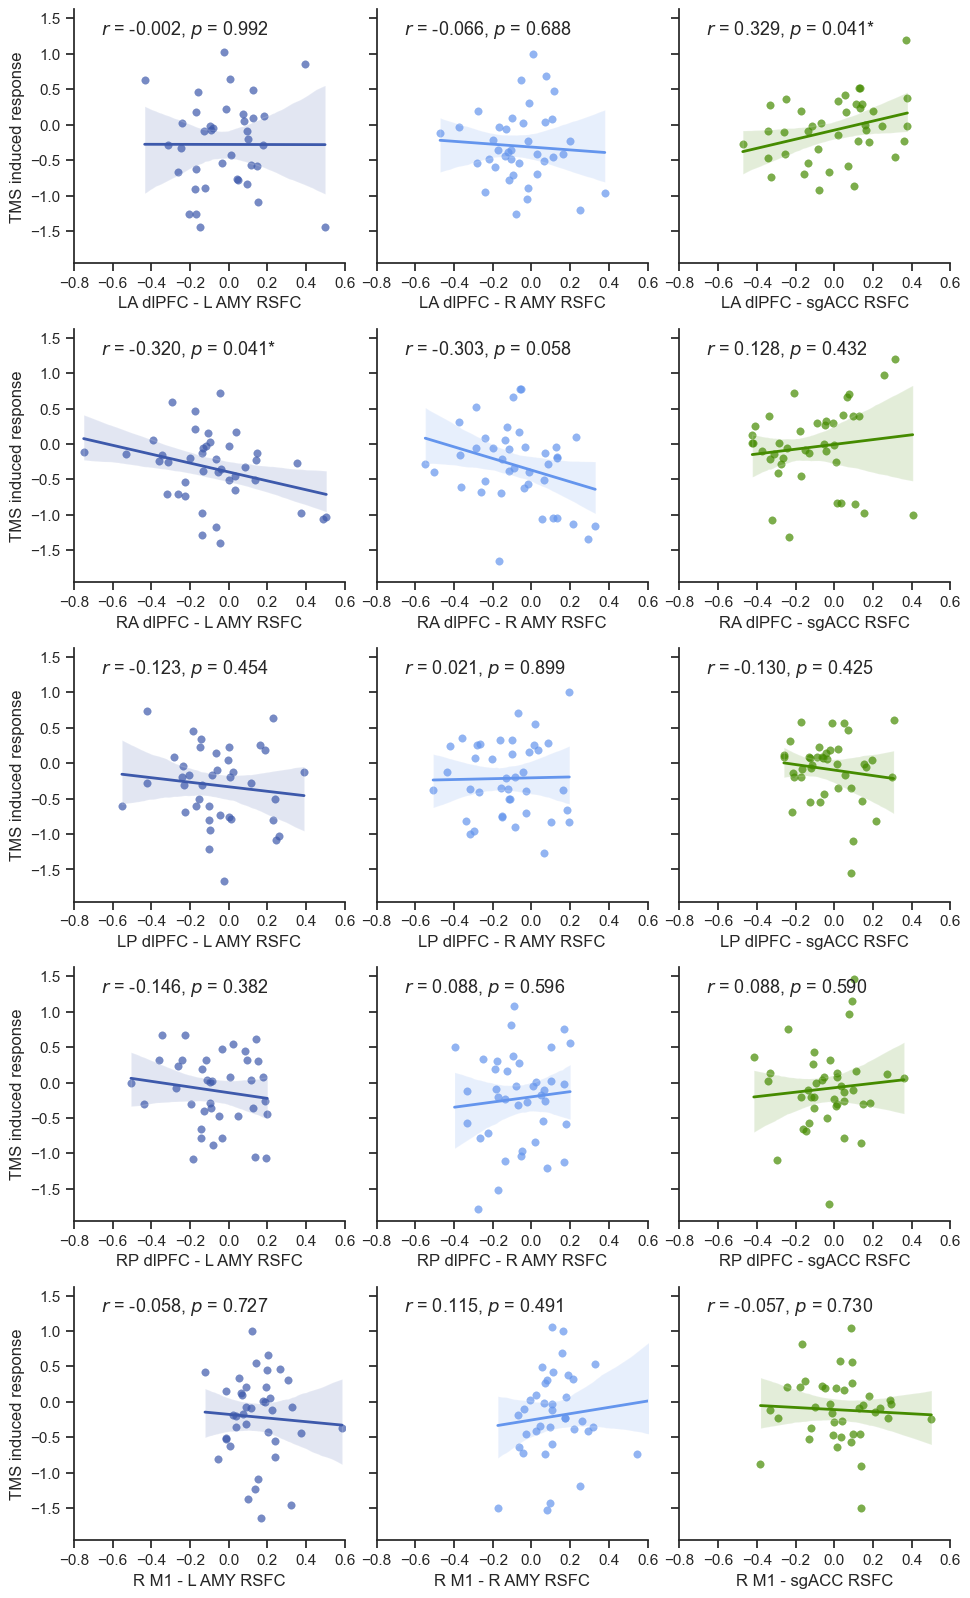

In [200]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']
fig = scatter_plot(plot_data_all, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')


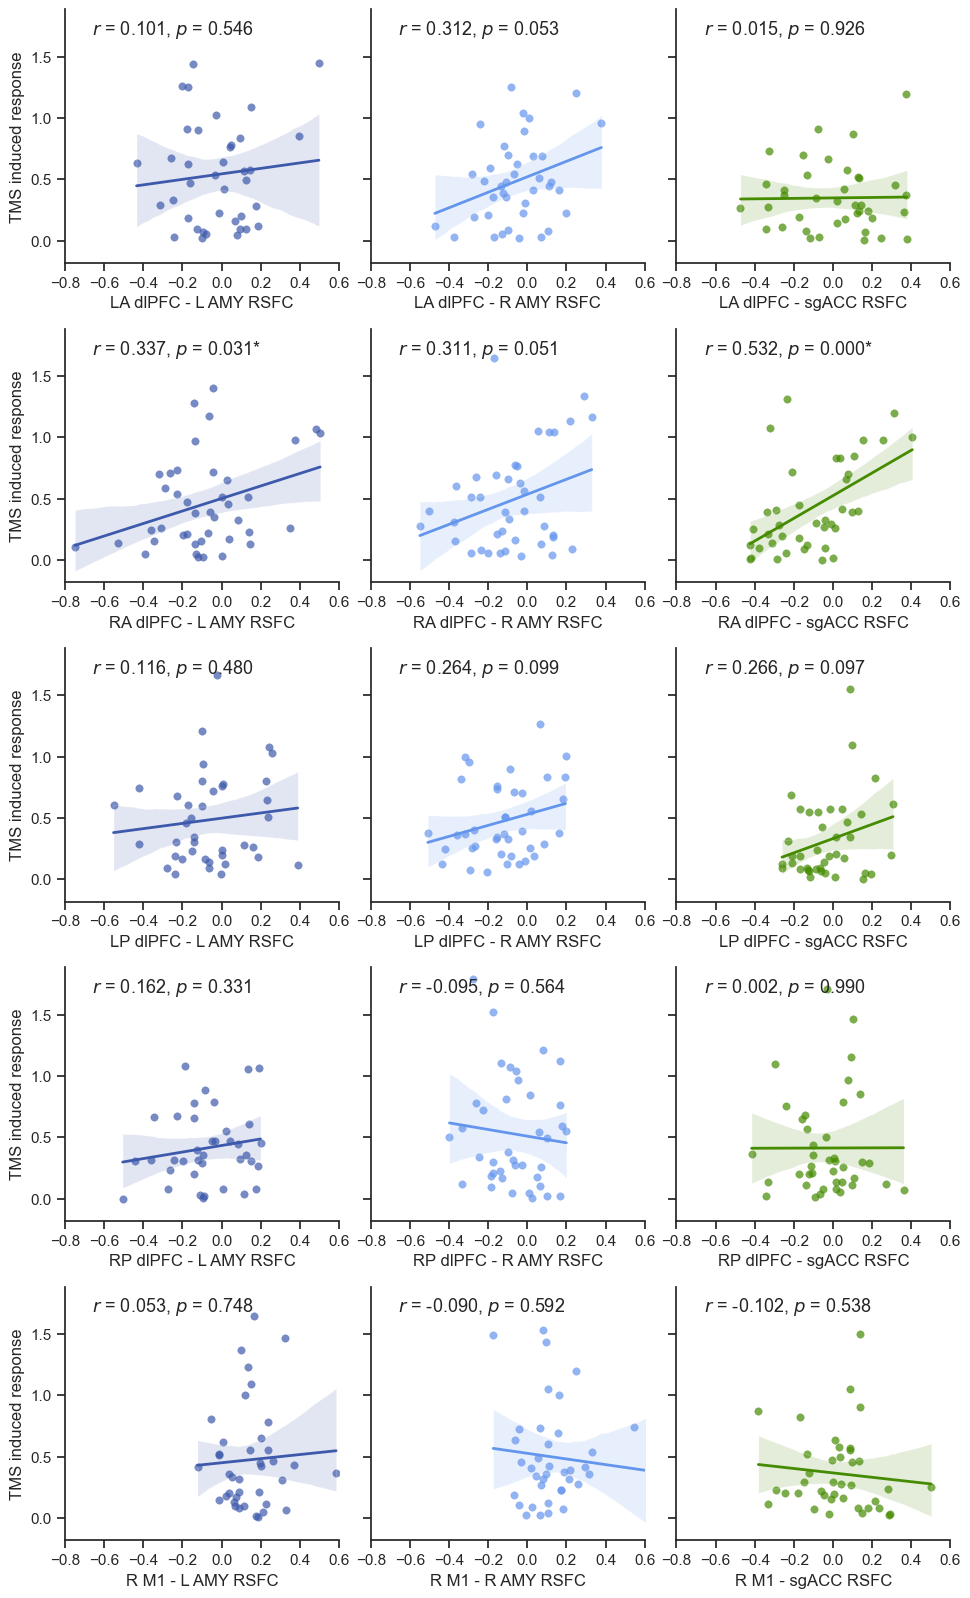

In [202]:
## show absolute connectivities:

# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_abs = plot_data_all.copy()
plot_data_all_abs['mean_response'] = abs(plot_data_all['mean_response'])
fig = scatter_plot(plot_data_all_abs, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')


In [ ]:
## show positive connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_pos = plot_data_all.loc[plot_data_all['connectivity'] >=0, :]
fig = scatter_plot(plot_data_all_pos, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [ ]:
## show negative connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_neg = plot_data_all.loc[plot_data_all['connectivity'] < 0, :]
fig = scatter_plot(plot_data_all_neg, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [ ]:
sns.set_style(style='white')

fig = scatter_plot(plot_data_all.loc[plot_data_all['target'] == 'L_aMFG',:], ['L_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_aMFG',:], ['R_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_pMFG',:], ['R_pMFG'])

fig.axes[0, 0].set(xlabel = 'RP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RP dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'L_pMFG',:], ['L_pMFG'])

fig.axes[0, 0].set(xlabel = 'LP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'LP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'LP dlPFC - sgACC RSFC', title = '')
